In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


data = pd.read_csv("fifa21_train.csv")
data.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,...,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,...,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,...,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,...,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,...,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [2]:
pd.set_option('display.max_columns', None)
data.head()

,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,184383,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",NaN,€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,188044,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015","Dec 31, 2020",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,68+2,68+2,68+2,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,184431,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",NaN,€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,74+2,74+2,74+2,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80
3,233796,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,"5'10""",152lbs,Right,13,"Jul 1, 2016",NaN,€275K,€4K,€694K,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2 ★,2★,Medium,Medium,1 ★,57,44,54,57,57,60,7,50+2,50+2,50+2,51+0,51+0,51+0,51+0,51+0,53+2,53+2,53+2,53+2,56+2,56+2,56+2,53+2,56+2,58+2,58+2,58+2,56+2,57+2,58+2,58+2,58+2,57+2,14+2,59
4,234799,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,"5'11""",150lbs,Right,8,"Jul 1, 2018",NaN,€725K,€2K,€1.4M,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2 ★,3★,Low,Medium,1 ★,66,44,60,64,60,66,4,56+2,56+2,56+2,59+0,59+0,59+0,59+0,59+0,61+2,61+2,61+2,62+2,63+2,63+2,63+2,62+2,64+2,64+2,64+2,64+2,64+2,63+2,61+2,61+2,61+2,63+2,15+2,65


In [3]:
data.shape

(11701, 101)

In [4]:
sum(data.duplicated())

0

In [5]:
data.isna().sum()
round(data.isna().sum()/len(data),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data.isna().sum()/len(data),2)*100) #division not multiplication like in instructions

nulls_df = nulls_df.reset_index()

nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
header_name,ID,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
percent_nulls,0,0,0,0,0,0,2,0,0,0,0,0,0,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
data = data.drop(columns=['Loan Date End', 'ID', 'LCM', 'CM', 'RCM'])
data.head(3)

,Name,Age,Nationality,Club,BP,Position,Team & Contract,Height,Weight,foot,Growth,Joined,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,OVA
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80


In [7]:
data = data.dropna()  #Drop the rows where at least one element is NaN
data = data.reset_index(drop=True)
data.shape

(11211, 96)

In [8]:
n_cols = []
for i in range(len(data.columns)):
    n_cols.append(data.columns[i].lower().replace(' ', '_'))
data.columns = n_cols
    
data.head(3)

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,"5'9""",161lbs,Right,1,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan","6'0""",159lbs,Right,0,"Jan 16, 2015",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3 ★,4★,High,Low,2 ★,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,"5'4""",134lbs,Right,0,"Jan 31, 2019",€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4 ★,4★,High,Medium,2 ★,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80


In [9]:
pd.set_option('display.max_rows', None)
data.dtypes.T

name                 object
age                   int64
nationality          object
club                 object
bp                   object
position             object
team_&_contract      object
height               object
weight               object
foot                 object
growth                int64
joined               object
value                object
wage                 object
release_clause       object
contract             object
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk_accuracy           int64
long_passing          int64
ball_control          int64
movement              int64
acceleration          int64
sprint_speed          int64
agility             float64
reactions             int64
balance             float64
power                 int64
shot_power          

In [10]:
data['height'] = data['height'].str.replace("'", ".")
data['height'] = data['height'].str.replace('"', " ")

data['height'] = pd.to_numeric(data['height'], errors='coerce')

data.head(1)

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.9,161lbs,Right,1,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4 ★,2★,High,Medium,1 ★,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64


In [11]:
def Star (s):
    if s in ['4 ★','4★']:
        s = '4'
    elif s in ['5 ★','5★']:
        s = '5'
    elif s in ['3 ★','3★']:
        s = '3'
    elif s in ['2 ★','2★']:
        s = '2'
    elif s in ['1 ★','1★']:
        s = '1'
    return s


data['w/f'] = list(map(Star, data['w/f']))

data['sm'] = list(map(Star, data['sm']))

data['a/w'] = list(map(Star, data['a/w']))

data['ir'] = list(map(Star, data['ir']))

data.head(3)

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.9,161lbs,Right,1,"Jul 1, 2015",€525K,€4K,€801K,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.0,159lbs,Right,0,"Jan 16, 2015",€8.5M,€23K,€0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.4,134lbs,Right,0,"Jan 31, 2019",€9M,€49K,€15.3M,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80


In [12]:
data['value'] = data['value'].str.replace('€', '')
data['wage'] = data['wage'].str.replace('€', '')
data['release_clause'] = data['release_clause'].str.replace('€', '')

In [13]:
def money(x):
    if('M' in str(x)):
        x = str(x).replace('M', '')
        x = float(x) * 1000000
    elif('K' in str(x)):
        x = str(x).replace('K', '')
        x = float(x) * 1000
    return float(x)

In [14]:
data['value'] = data['value'].apply(money)
data['wage'] = data['wage'].apply(money)
data['release_clause'] = data['release_clause'].apply(money)

data.head(3)

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,ova
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.9,161lbs,Right,1,"Jul 1, 2015",525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,58+1,58+1,58+1,61+0,62+0,62+0,62+0,61+0,63+1,63+1,63+1,63+1,63+1,59+1,59+1,59+1,59+1,59+1,58+1,54+1,54+1,54+1,58+1,15+1,64
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.0,159lbs,Right,0,"Jan 16, 2015",8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77+0,77+0,77+0,77+0,77+0,77+0,77+0,77+0,76+1,76+1,76+1,76+1,76+1,57+2,53+2,53+2,53+2,57+2,53+2,48+2,48+2,48+2,53+2,18+2,77
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.4,134lbs,Right,0,"Jan 31, 2019",9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,73+2,73+2,73+2,80+0,79+0,79+0,79+0,80+0,80+0,80+0,80+0,79+1,79+1,59+2,56+2,56+2,56+2,59+2,53+2,41+2,41+2,41+2,53+2,12+2,80


In [15]:
def plus(a):
    if '+' in a:
        l = a.split('+')
    l = [int(i) for i in l]
    return sum(l)

In [16]:
list_l = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'rm', 'lwb',
            'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk']

for i in range(len(list_l)):
    data[list_l[i]+' '] = data[list_l[i]].apply(plus)
    data = data.drop(list_l[i], axis=1)
        

In [17]:
data.head()

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ova,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.90,161lbs,Right,1,"Jul 1, 2015",525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,64,59,59,59,61,62,62,62,61,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.00,159lbs,Right,0,"Jan 16, 2015",8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,77,77,59,55,55,55,59,55,50,50,50,55,20
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.40,134lbs,Right,0,"Jan 31, 2019",9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,80,75,75,75,80,79,79,79,80,80,80,80,80,80,61,58,58,58,61,55,43,43,43,55,14
3,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,5.10,152lbs,Right,13,"Jul 1, 2016",275000.0,4000.0,694000.0,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,59,52,52,52,51,51,51,51,51,55,55,55,55,55,58,60,60,60,58,59,60,60,60,59,16
4,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,5.11,150lbs,Right,8,"Jul 1, 2018",725000.0,2000.0,1400000.0,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,65,58,58,58,59,59,59,59,59,63,63,63,64,64,66,66,66,66,66,65,63,63,63,65,17


In [18]:
data.to_csv('fifa_clean.csv', index = False)

In [19]:
df = pd.read_csv('fifa_clean.csv')
df.head()

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ova,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.90,161lbs,Right,1,"Jul 1, 2015",525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,64,59,59,59,61,62,62,62,61,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.00,159lbs,Right,0,"Jan 16, 2015",8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,77,77,59,55,55,55,59,55,50,50,50,55,20
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.40,134lbs,Right,0,"Jan 31, 2019",9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,80,75,75,75,80,79,79,79,80,80,80,80,80,80,61,58,58,58,61,55,43,43,43,55,14
3,J. Evans,22,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,5.10,152lbs,Right,13,"Jul 1, 2016",275000.0,4000.0,694000.0,2016 ~ 2021,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,Medium,Medium,1,57,44,54,57,57,60,7,59,52,52,52,51,51,51,51,51,55,55,55,55,55,58,60,60,60,58,59,60,60,60,59,16
4,Y. Demoncy,23,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,5.11,150lbs,Right,8,"Jul 1, 2018",725000.0,2000.0,1400000.0,2018 ~ 2021,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,Low,Medium,1,66,44,60,64,60,66,4,65,58,58,58,59,59,59,59,59,63,63,63,64,64,66,66,66,66,66,65,63,63,63,65,17


In [21]:
numeric = df.select_dtypes(include = np.number)
numeric.shape

(11211, 83)

In [23]:
keep = (((numeric.corrwith(numeric['ova']))**2)**.5)
#keep

In [22]:
corrs_drop = []
threshold = 0.5
for i in range(keep.shape[0]):
    if keep[i] < threshold:
        keep[i] = np.nan
        corrs_drop.append(keep.index[i])
        
keep = keep.dropna()
numeric = numeric.drop(corrs_drop, axis=1)

numeric.head()

,age,growth,value,wage,release_clause,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,ova
0,26,1,525000.0,4000.0,801000.0,66,306,62,68.0,54.0,1682,357,63,63,60,64
1,30,0,8500000.0,23000.0,0.0,75,372,74,72.0,70.0,1961,412,68,82,71,77
2,33,0,9000000.0,49000.0,15300000.0,78,308,79,78.0,82.0,1925,404,78,86,56,80
3,22,13,275000.0,4000.0,694000.0,55,277,57,54.0,48.0,1527,329,54,57,60,59
4,23,8,725000.0,2000.0,1400000.0,62,280,61,64.0,58.0,1664,360,60,64,66,65


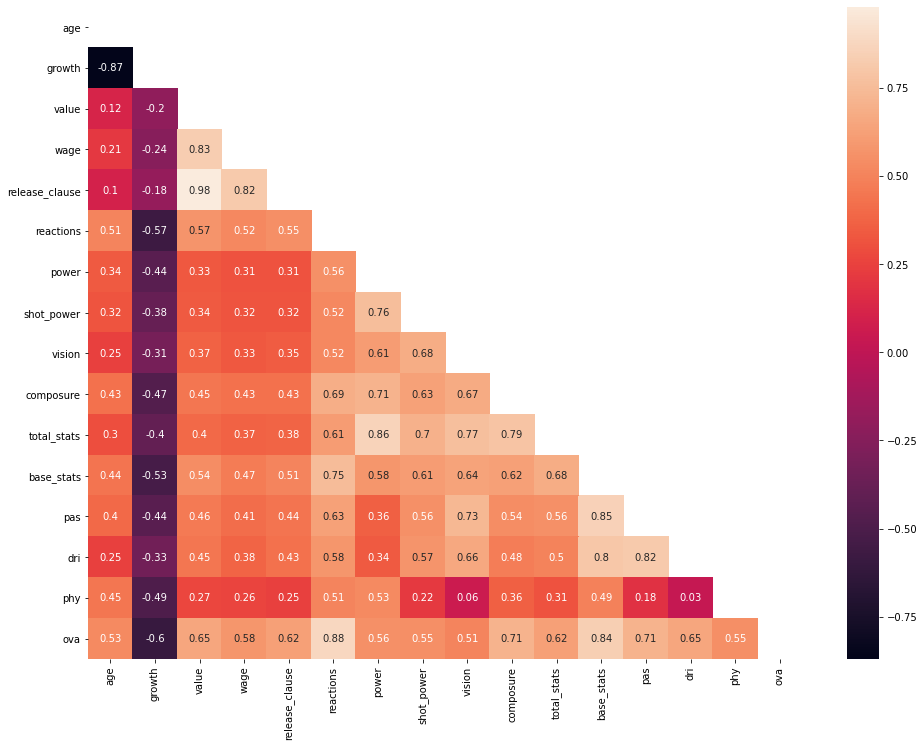

In [23]:
#import numpy as np

corr = np.corrcoef(numeric.corr().round(2))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style():
    f, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(numeric.corr().round(2), mask=mask, annot = True)

In [24]:
numerical_clean =numeric.drop(columns = ['growth', 'wage', 'release_clause'])
numerical_clean.head()

,age,value,reactions,power,shot_power,vision,composure,total_stats,base_stats,pas,dri,phy,ova
0,26,525000.0,66,306,62,68.0,54.0,1682,357,63,63,60,64
1,30,8500000.0,75,372,74,72.0,70.0,1961,412,68,82,71,77
2,33,9000000.0,78,308,79,78.0,82.0,1925,404,78,86,56,80
3,22,275000.0,55,277,57,54.0,48.0,1527,329,54,57,60,59
4,23,725000.0,62,280,61,64.0,58.0,1664,360,60,64,66,65


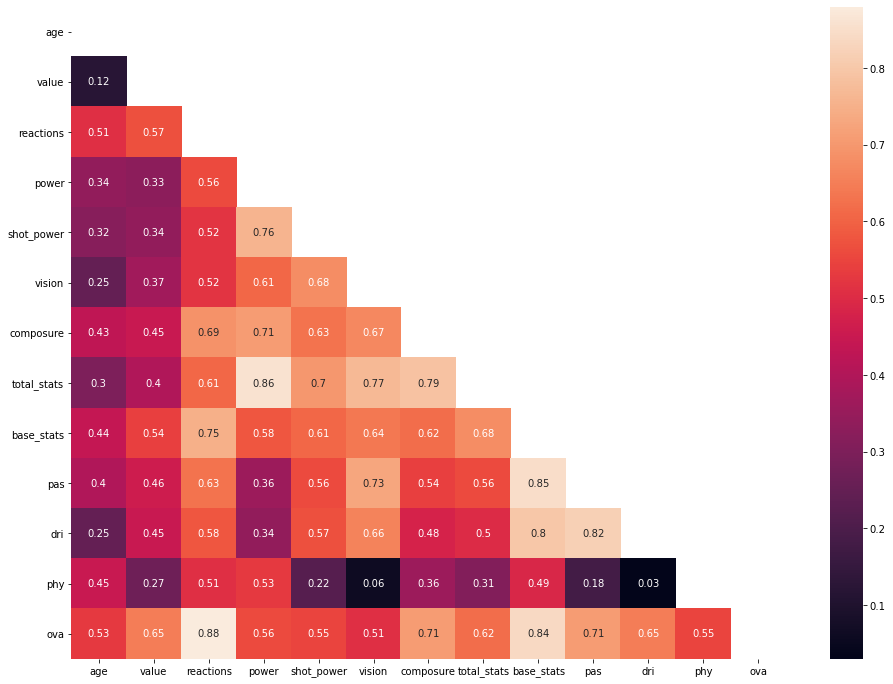

In [25]:
corr = np.corrcoef(numerical_clean.corr().round(2))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style():
    f, ax = plt.subplots(figsize=(16, 12))
    sns.heatmap(numerical_clean.corr().round(2), mask=mask, annot = True)

In [27]:
df.head(3)

,name,age,nationality,club,bp,position,team_&_contract,height,weight,foot,growth,joined,value,wage,release_clause,contract,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,a/w,d/w,ir,pac,sho,pas,dri,def,phy,hits,ova,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,A. Pasche,26,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,5.9,161lbs,Right,1,"Jul 1, 2015",525000.0,4000.0,801000.0,2015 ~ 2020,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,High,Medium,1,69,51,63,63,51,60,3,64,59,59,59,61,62,62,62,61,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16
1,Alan Carvalho,30,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",6.0,159lbs,Right,0,"Jan 16, 2015",8500000.0,23000.0,0.0,"Dec 31, 2020 On Loan",365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,High,Low,2,83,75,68,82,33,71,44,77,77,77,77,77,77,77,77,77,77,77,77,77,77,59,55,55,55,59,55,50,50,50,55,20
2,S. Giovinco,33,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,5.4,134lbs,Right,0,"Jan 31, 2019",9000000.0,49000.0,15300000.0,2019 ~ 2022,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,High,Medium,2,80,77,78,86,27,56,73,80,75,75,75,80,79,79,79,80,80,80,80,80,80,61,58,58,58,61,55,43,43,43,55,14


In [28]:
from sklearn.preprocessing import MinMaxScaler

y = df['ova']
X = df.drop(['ova'], axis=1)

X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = np.object)

In [29]:
X_num.head()

,age,height,growth,value,wage,release_clause,attacking,crossing,finishing,heading_accuracy,short_passing,volleys,skill,dribbling,curve,fk_accuracy,long_passing,ball_control,movement,acceleration,sprint_speed,agility,reactions,balance,power,shot_power,jumping,stamina,strength,long_shots,mentality,aggression,interceptions,positioning,vision,penalties,composure,defending,marking,standing_tackle,sliding_tackle,goalkeeping,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,total_stats,base_stats,w/f,sm,ir,pac,sho,pas,dri,def,phy,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,26,5.90,1,525000.0,4000.0,801000.0,258,54,47,43,70,44.0,286,61,44.0,55,63,63,346,64,73,61.0,66,82.0,306,62,73.0,71,55,45,290,54,52.0,62.0,68.0,54,54.0,148,49,56,43.0,48,7,12,14,9,6,1682,357,4,2,1,69,51,63,63,51,60,59,59,59,61,62,62,62,61,64,64,64,64,64,60,60,60,60,60,59,55,55,55,59,16
1,30,6.00,0,8500000.0,23000.0,0.0,365,66,79,76,68,76.0,375,83,78.0,72,63,79,404,83,83,88.0,75,75.0,372,74,81.0,75,74,68,313,54,33.0,78.0,72.0,76,70.0,77,35,20,22.0,55,11,7,14,7,16,1961,412,3,4,2,83,75,68,82,33,71,77,77,77,77,77,77,77,77,77,77,77,77,77,59,55,55,55,59,55,50,50,50,55,20
2,33,5.40,0,9000000.0,49000.0,15300000.0,336,73,76,34,78,75.0,424,85,89.0,91,74,85,424,84,76,93.0,78,93.0,308,79,34.0,75,42,78,332,75,26.0,80.0,78.0,73,82.0,80,23,29,28.0,21,6,3,6,3,3,1925,404,4,4,2,80,77,78,86,27,56,75,75,75,80,79,79,79,80,80,80,80,80,80,61,58,58,58,61,55,43,43,43,55,14
3,22,5.10,13,275000.0,4000.0,694000.0,242,44,42,58,62,36.0,259,54,41.0,46,57,61,282,54,59,59.0,55,55.0,277,57,60.0,64,58,38,257,61,57.0,31.0,54.0,54,48.0,168,55,58,55.0,42,8,9,6,7,12,1527,329,2,2,1,57,44,54,57,57,60,52,52,52,51,51,51,51,51,55,55,55,55,55,58,60,60,60,58,59,60,60,60,59,16
4,23,5.11,8,725000.0,2000.0,1400000.0,249,49,37,61,68,34.0,280,64,44.0,45,61,66,324,66,66,61.0,62,69.0,280,61,34.0,81,61,43,294,66,60.0,55.0,64.0,49,58.0,185,58,61,66.0,52,8,9,15,5,15,1664,360,2,3,1,66,44,60,64,60,66,58,58,58,59,59,59,59,59,63,63,63,64,64,66,66,66,66,66,65,63,63,63,65,17


In [31]:
X_num = X_num[['age', 'value', 'reactions', 'power', 'shot_power', 'vision', 'composure', 'total_stats', 'base_stats', 
               'pas', 'dri', 'phy']]
#X_num

In [32]:
X_cat.head()

,name,nationality,club,bp,position,team_&_contract,weight,foot,joined,contract,a/w,d/w,hits
0,A. Pasche,Switzerland,FC Lausanne-Sport,CM,CM CDM,FC Lausanne-Sport 2015 ~ 2020,161lbs,Right,"Jul 1, 2015",2015 ~ 2020,High,Medium,3
1,Alan Carvalho,China PR,Beijing Sinobo Guoan FC,ST,ST LW LM,"Beijing Sinobo Guoan FC Dec 31, 2020 On Loan",159lbs,Right,"Jan 16, 2015","Dec 31, 2020 On Loan",High,Low,44
2,S. Giovinco,Italy,Al Hilal,CAM,CAM CF,Al Hilal 2019 ~ 2022,134lbs,Right,"Jan 31, 2019",2019 ~ 2022,High,Medium,73
3,J. Evans,Wales,Swansea City,CDM,CDM CM,Swansea City 2016 ~ 2021,152lbs,Right,"Jul 1, 2016",2016 ~ 2021,Medium,Medium,7
4,Y. Demoncy,France,US Orléans Loiret Football,CDM,CDM CM,US Orléans Loiret Football 2018 ~ 2021,150lbs,Right,"Jul 1, 2018",2018 ~ 2021,Low,Medium,4


In [33]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11211 entries, 0 to 11210
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             11211 non-null  object
 1   nationality      11211 non-null  object
 2   club             11211 non-null  object
 3   bp               11211 non-null  object
 4   position         11211 non-null  object
 5   team_&_contract  11211 non-null  object
 6   weight           11211 non-null  object
 7   foot             11211 non-null  object
 8   joined           11211 non-null  object
 9   contract         11211 non-null  object
 10  a/w              11211 non-null  object
 11  d/w              11211 non-null  object
 12  hits             11211 non-null  object
dtypes: object(13)
memory usage: 1.1+ MB


In [36]:
X_cat = X_cat[['bp', 'weight', 'foot', 'a/w', 'd/w']]

In [37]:
X_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11211 entries, 0 to 11210
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bp      11211 non-null  object
 1   weight  11211 non-null  object
 2   foot    11211 non-null  object
 3   a/w     11211 non-null  object
 4   d/w     11211 non-null  object
dtypes: object(5)
memory usage: 438.1+ KB


In [38]:
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
print(x_normalized.shape)
#x_normalized
pd.DataFrame(x_normalized, columns=X_num.columns)
x_normalized = pd.DataFrame(x_normalized)
#x_normalized

(11211, 12)


In [39]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder().fit(X_cat)
#print(encoder.categories_)
encoded = encoder.transform(X_cat).toarray()
#print(encoded)
cols = [colname for row in encoder.categories_ for colname in row]
#cols
onehot_encoded = pd.DataFrame(encoded, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]
#cols_to_drop
onehot_encoded = onehot_encoded.drop(cols_to_drop,axis=1)
#onehot_encoded.head()
print(onehot_encoded.shape)

(11211, 72)


In [40]:
X = pd.concat([x_normalized, onehot_encoded], axis=1)

In [41]:
X.shape

(11211, 84)

In [42]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8968, 84)
(2243, 84)
(8968,)
(2243,)


In [44]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

**R2**

In [45]:
from sklearn.metrics import r2_score 

predictions2 = lm.predict(X_test) 

r2_test = r2_score(y_test, predictions2)
print('test R2:', r2_test)

test R2: 0.9084607707944621


In [46]:
predictions = lm.predict(X_train)

r2_train = r2_score(y_train, predictions) 
print('train R2:',r2_train)

train R2: 0.9094314486695131


**MSE**

In [47]:
from sklearn.metrics import mean_squared_error as mse 

test_mse = mse(lm.predict(X_test), y_test) 
print('test MSE:', test_mse)

test MSE: 4.292993270659248


**RMSE**

In [48]:
from math import sqrt

test_rmse = sqrt(test_mse) 
print('test RMSE', test_rmse)

test RMSE 2.071953974068741


**MAE**

In [49]:
from sklearn.metrics import mean_absolute_error as mae

test_mae = mae(lm.predict(X_test), y_test) 
print('test MAE', test_mae)

test MAE 1.5978364747278406
